In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

Open the data as pandas dataframe

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)

In [2]:
raw_data = pd.read_csv("Breast_GSE45827.csv")

Looking on the data

In [37]:
raw_data.columns

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)

In [30]:
raw_data.shape


(151, 54675)

In [3]:
raw_data.head

<bound method NDFrame.head of      samples       type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0         84      basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1         85      basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2         87      basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3         90      basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4         91      basal   9.408330  7.746404  6.693980  7.333426   3.169923   
..       ...        ...        ...       ...       ...       ...        ...   
146      230  luminal_B  10.392638  7.334408  6.848586  7.020486   3.228065   
147      233  luminal_B  10.930875  8.415294  5.906827  7.753572   3.270557   
148      236  luminal_B  11.027098  7.180876  6.304736  7.641197   3.206950   
149      237  luminal_B  10.444395  7.525153  5.964460  7.825939   3.384147   
150      238  luminal_B  11.345817  7.379299  5.891172  7.394586   3.183420   

      1294_at   1316_

In [4]:
metadata = raw_data[['samples', 'type']]
metadata

,samples,type
0,84,basal
1,85,basal
2,87,basal
3,90,basal
4,91,basal
...,...,...
146,230,luminal_B
147,233,luminal_B
148,236,luminal_B
149,237,luminal_B


In [5]:
raw_data = raw_data.drop(['samples', 'type'], axis = 1)

C:\Users\itani\AppData\Local\Temp\ipykernel_38200\3016424589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['type'] = metadata['type'].map(lambda x: 'healthy' if x == 'normal' else x)


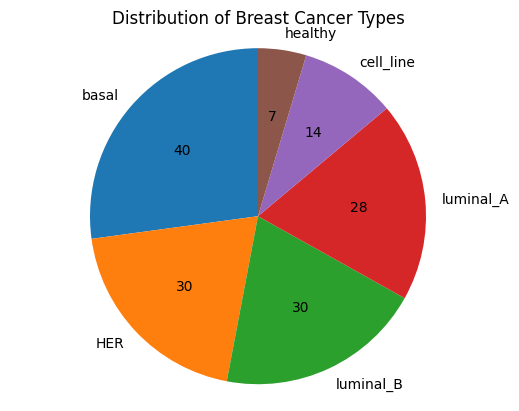

In [90]:
metadata['type'] = metadata['type'].map(lambda x: 'healthy' if x == 'normal' else x)
# Assuming 'metadata' is your DataFrame and it has a 'type' column with labels like 'malignant' and 'benign'
type_counts = metadata['type'].value_counts()  # This will count the occurrences of each label

# Create a pie chart with counts instead of percentages
plt.pie(type_counts, labels=type_counts.index, autopct=lambda p: f'{int(p * sum(type_counts) / 100)}', startangle=90)
plt.title('Distribution of Breast Cancer Types')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

[Check for the distribution of gene expression maximum value and minimum value

Text(0, 0.5, 'N genes')

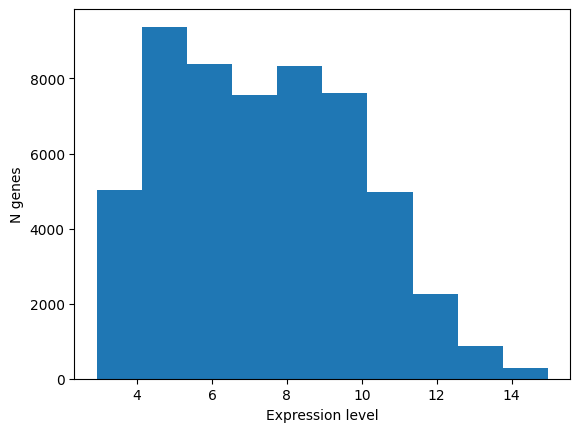

In [6]:
max_value_by_gene = raw_data.max()
plt.hist(max_value_by_gene)
plt.xlabel("Expression level")
plt.ylabel("N genes")

Text(0, 0.5, 'N genes')

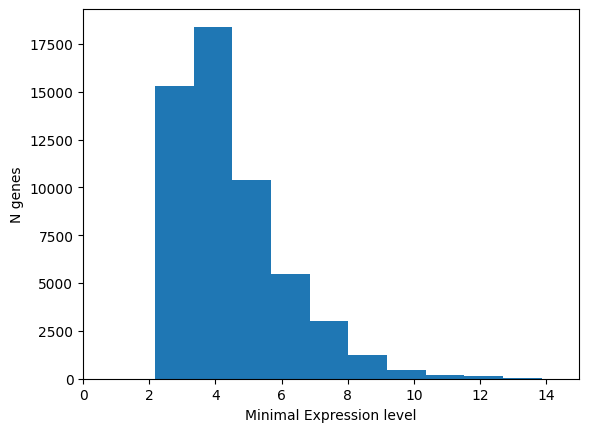

In [86]:
min_value_by_gene =raw_data.min()
plt.hist(min_value_by_gene)
plt.xlim(0,15)
plt.xlabel("Minimal Expression level")
plt.ylabel("N genes")

Examining the distribution of a single random gene expression levels

In [8]:
random1_gene_index1  = np.random.randint(2, raw_data.shape[1])
print(random1_gene_index1)

52304


(array([ 2.,  1.,  3.,  4.,  7.,  6.,  9., 10., 18., 10.,  9., 17., 11.,
        14., 11.,  5.,  9.,  1.,  1.,  3.]),
 array([4.72543094, 4.84935138, 4.97327182, 5.09719226, 5.2211127 ,
        5.34503314, 5.46895358, 5.59287402, 5.71679445, 5.84071489,
        5.96463533, 6.08855577, 6.21247621, 6.33639665, 6.46031709,
        6.58423753, 6.70815797, 6.8320784 , 6.95599884, 7.07991928,
        7.20383972]),
 <BarContainer object of 20 artists>)

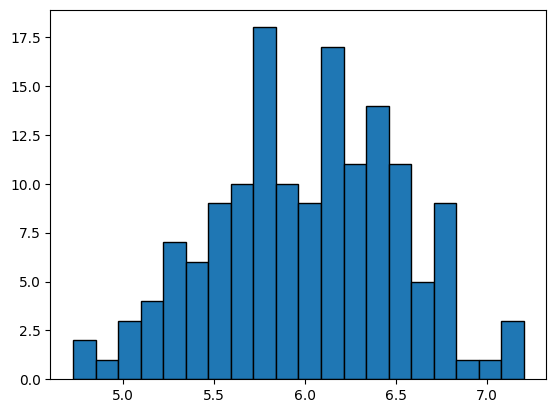

In [9]:
random_gene_1 = raw_data.iloc[:,random1_gene_index1]
min_value = random_gene_1.min()
max_value = random_gene_1.max()

plt.hist(random_gene_1, bins=20, range=(min_value, max_value), edgecolor='black')

In [10]:
random_gene_index2  = np.random.randint(2, raw_data.shape[1])
print(random_gene_index2)

5563


(array([ 2., 11., 19., 27., 29., 14., 12.,  7., 10.,  7.,  3.,  5.,  3.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([2.9490571 , 3.0589163 , 3.16877549, 3.27863469, 3.38849389,
        3.49835308, 3.60821228, 3.71807148, 3.82793068, 3.93778987,
        4.04764907, 4.15750827, 4.26736746, 4.37722666, 4.48708586,
        4.59694506, 4.70680425, 4.81666345, 4.92652265, 5.03638184,
        5.14624104]),
 <BarContainer object of 20 artists>)

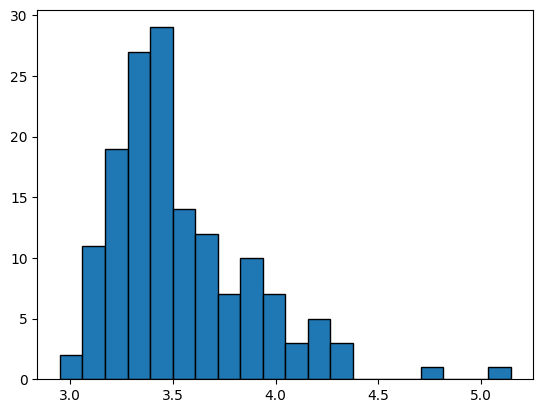

In [11]:
random_gene_2 = raw_data.iloc[:,random_gene_index2]
min_value = random_gene_2.min()
max_value = random_gene_2.max()

plt.hist(random_gene_2, bins=20, range=(min_value, max_value), edgecolor='black')

(array([ 1.,  1.,  0.,  2.,  4.,  3.,  7.,  1., 15., 14., 19., 16., 23.,
        18.,  7.,  7.,  5.,  4.,  1.,  3.]),
 array([ 7.04775283,  7.2707716 ,  7.49379036,  7.71680912,  7.93982789,
         8.16284665,  8.38586541,  8.60888418,  8.83190294,  9.0549217 ,
         9.27794047,  9.50095923,  9.72397799,  9.94699676, 10.17001552,
        10.39303428, 10.61605305, 10.83907181, 11.06209057, 11.28510934,
        11.5081281 ]),
 <BarContainer object of 20 artists>)

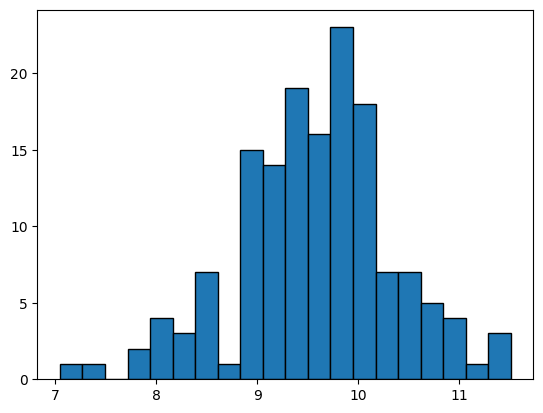

In [12]:
random_gene_index3  = np.random.randint(2, raw_data.shape[1])
random_gene_3 = raw_data.iloc[:,random_gene_index3]
min_value = random_gene_3.min()
max_value = random_gene_3.max()

plt.hist(random_gene_3, bins=20, range=(min_value, max_value), edgecolor='black')

CONCLUSION: it looks that the gene expression of each gene distributes pretty normal

STANDARDIZATION

In [13]:

standardized_data = (raw_data - raw_data.mean()) / raw_data.std()
standardized_data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,-0.796911,0.659647,0.309625,0.041650,-0.982510,-0.669939,-1.221486,-0.990983,0.657097,-1.294768,...,-0.407912,0.079946,-1.416048,-1.016437,-1.581002,-0.793231,-1.346111,0.514171,-0.794485,1.257337
1,-0.778462,0.821432,1.297896,1.046861,-0.225184,0.361385,-0.658296,-0.420280,-0.012174,-0.649134,...,-0.568634,-0.037791,-1.056079,-1.042430,-0.991022,-0.473998,-0.817479,0.171697,0.437831,-1.075187
2,-0.383771,1.846133,-0.757498,1.053643,-0.373298,-1.164743,-1.731788,-0.936317,0.989070,-0.726807,...,-0.736400,-0.263938,-1.561667,-1.644948,-1.486373,-0.612934,-1.049747,-0.763377,-0.504913,-0.150456
3,-0.948782,-0.388926,0.393994,-1.065889,-0.022742,0.766407,0.568727,-0.473632,0.749052,-1.225005,...,-0.779968,-0.281650,-1.083568,-0.909186,-1.179380,-0.587432,-1.152189,1.211560,-0.681094,0.969485
4,-1.516959,0.162066,0.726789,-0.017599,-0.096461,0.467561,0.166324,-0.938811,0.978209,-1.109129,...,-0.583987,0.102499,-0.868236,-0.794423,-1.407795,-0.765344,-0.996246,0.402224,-1.227744,0.197039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.087599,-0.421115,0.966326,-0.963533,0.269417,0.786801,0.424382,-0.703745,0.138220,0.466762,...,0.876005,0.807723,1.232749,1.242257,1.018865,-0.844889,0.024669,-0.707879,0.505106,1.564390
147,0.965000,1.108880,-0.492781,1.252388,0.536820,0.089848,1.980777,1.556490,0.279337,-0.346661,...,0.514712,0.417956,1.052552,1.025478,0.665969,0.964064,0.967226,0.118400,1.439401,0.392768
148,1.121856,-0.638439,0.123716,0.912708,0.136544,1.960867,1.696569,-0.313681,-0.160285,-0.381614,...,-0.322946,-0.438709,0.517557,0.702257,0.850340,1.374774,1.199266,1.786327,0.033288,0.411550
149,0.171970,-0.151116,-0.403488,1.471134,1.251633,-0.065079,-0.266241,1.211828,-0.256597,0.511598,...,-0.118405,-0.258724,0.662083,0.586773,0.355898,1.324337,0.947359,1.071143,1.008218,-0.702309


In [14]:
normalized_metadata_included  = pd.concat([metadata, standardized_data], axis=1)

In [15]:
normalized_metadata_included.head

<bound method NDFrame.head of      samples       type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0         84      basal  -0.796911  0.659647  0.309625  0.041650  -0.982510   
1         85      basal  -0.778462  0.821432  1.297896  1.046861  -0.225184   
2         87      basal  -0.383771  1.846133 -0.757498  1.053643  -0.373298   
3         90      basal  -0.948782 -0.388926  0.393994 -1.065889  -0.022742   
4         91      basal  -1.516959  0.162066  0.726789 -0.017599  -0.096461   
..       ...        ...        ...       ...       ...       ...        ...   
146      230  luminal_B   0.087599 -0.421115  0.966326 -0.963533   0.269417   
147      233  luminal_B   0.965000  1.108880 -0.492781  1.252388   0.536820   
148      236  luminal_B   1.121856 -0.638439  0.123716  0.912708   0.136544   
149      237  luminal_B   0.171970 -0.151116 -0.403488  1.471134   1.251633   
150      238  luminal_B   1.641413 -0.357571 -0.517037  0.167270  -0.011531   

      1294_at   1316_

PCA on all samples

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.log(1+raw_data))
pca = PCA(n_components=2)  # You can choose the number of components you want
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
explained_variance = pca.explained_variance_ratio_

In [18]:
explained_variance

array([0.11352928, 0.10364711])

In [19]:
color_by = metadata['type']
color_by

0          basal
1          basal
2          basal
3          basal
4          basal
         ...    
146    luminal_B
147    luminal_B
148    luminal_B
149    luminal_B
150    luminal_B
Name: type, Length: 151, dtype: object

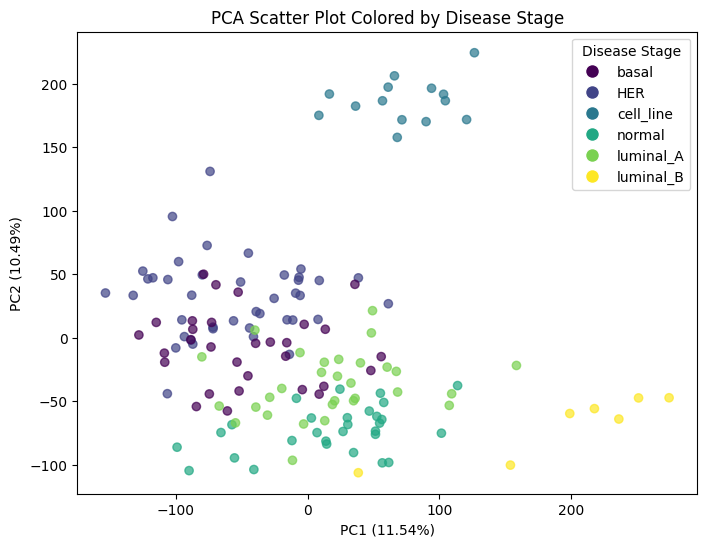

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Assuming pca_df contains the PCA results with 'PC1' and 'PC2'
# and metadata contains the 'type' column representing disease stages.

# Extract the disease stage (type) column
types = metadata['type']  # 'type' column represents the disease stage

# Step 1: Create the scatter plot, color by disease stage (type)
plt.figure(figsize=(8, 6))

# Get unique disease stages and assign a unique color to each
unique_types = metadata['type'].unique()

# Create a colormap with as many colors as there are unique disease stages
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(unique_types))))

# Create scatter plot
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'],
                      c=types.astype('category').cat.codes, cmap=cmap, alpha=0.7)

# Step 2: Create a normal legend based on the disease stages
# Create a list of handles and labels for the legend
handles = []
for i, disease_stage in enumerate(unique_types):
    # Generate a dummy scatter plot entry for each disease stage using the same color mapping
    handles.append(plt.Line2D([0], [0], marker='o', color='w',
                               markerfacecolor=cmap(i / len(unique_types)), markersize=10, label=disease_stage))

# Step 3: Add labels and title
# We can add explained variance to axis labels
explained_variance = pca.explained_variance_ratio_
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.title('PCA Scatter Plot Colored by Disease Stage')

# Step 4: Add legend
plt.legend(handles=handles, title='Disease Stage')

# Step 5: Show the plot
plt.show()


Maybe adding another principal component is a good idea

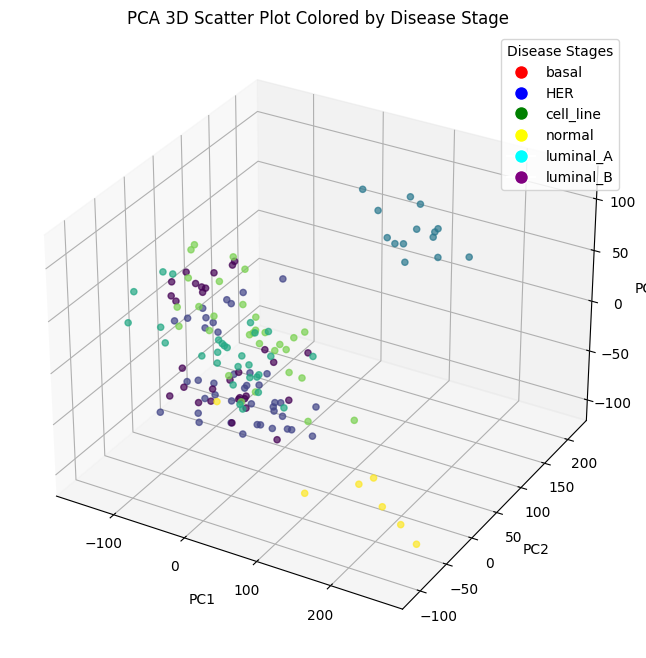

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.log(1+raw_data))
pca = PCA(n_components=3)  # You can choose the number of components you want
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3'])
explained_variance = pca.explained_variance_ratio_
# Step 3: Create a 3D scatter plot, color by disease stage
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get unique disease stages
unique_types = metadata['type'].unique()


# Create scatter plot with PCA results
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                     c=types.astype('category').cat.codes, cmap=cmap, alpha=0.7)

# Step 4: Create a normal legend based on the disease stages
handles = []
for i, disease_stage in enumerate(unique_types):
    handles.append(plt.Line2D([0], [0], marker='o', color='w',
                               markerfacecolor=cmap(i), markersize=10, label=disease_stage))

# Step 5: Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Scatter Plot Colored by Disease Stage')

cmap = plt.get_cmap('viridis', len(unique_types))
dictionary = dict(zip(unique_types, ['red', 'blue', 'green', 'yellow', 'cyan', 'purple']))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in dictionary.values()]
ax.legend(handles, dictionary.keys(), title="Disease Stages")

# Step 7: Show the plot
plt.show()

tSNE

You should consider upgrading via the 'C:\Users\itani\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


C:\Users\itani\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


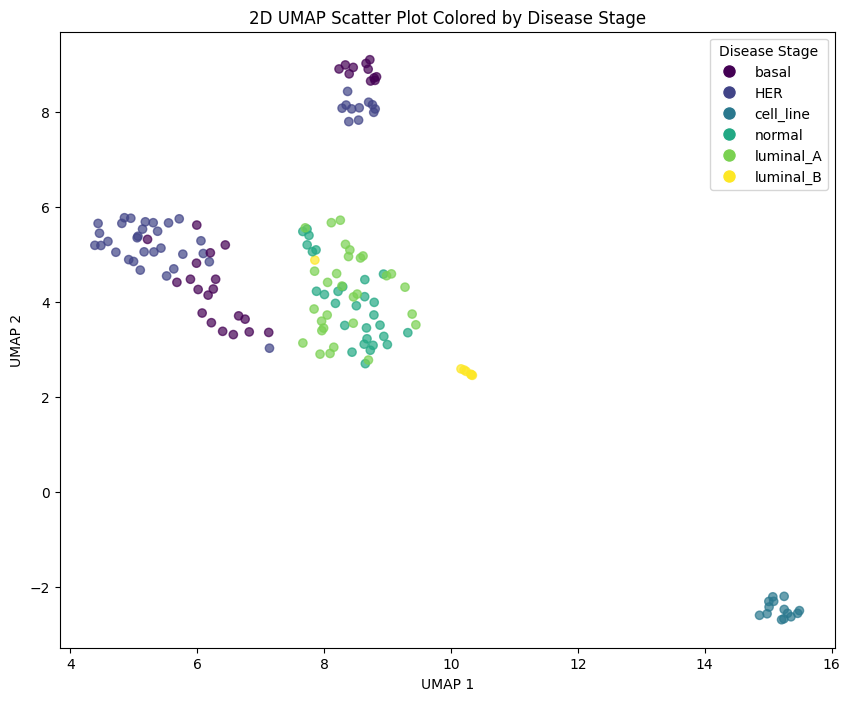

In [22]:
!pip install umap-learn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Assuming metadata contains the 'type' column representing disease stages and the data to apply UMAP to

# Extract the disease stage (type) column
types = metadata['type']  # 'type' column represents the disease stage

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.log(1+raw_data))  # Exclude 'type' column

# Step 2: Apply UMAP (reduce to 2 dimensions)
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(scaled_data)

# Step 3: Create a 2D scatter plot, color by disease stage
fig, ax = plt.subplots(figsize=(10, 8))

# Get unique disease stages
unique_types = metadata['type'].unique()

# Create a colormap with as many colors as there are unique disease stages
cmap = plt.get_cmap('viridis', len(unique_types))

# Create scatter plot with UMAP results
scatter = ax.scatter(umap_result[:, 0], umap_result[:, 1],
                     c=types.astype('category').cat.codes, cmap=cmap, alpha=0.7)

# Step 4: Create a normal legend based on the disease stages
handles = []
for i, disease_stage in enumerate(unique_types):
    handles.append(plt.Line2D([0], [0], marker='o', color='w',
                               markerfacecolor=cmap(i), markersize=10, label=disease_stage))

# Step 5: Add labels and title
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title('2D UMAP Scatter Plot Colored by Disease Stage')

# Step 6: Add legend
ax.legend(handles=handles, title='Disease Stage')

# Step 7: Show the plot
plt.show()


C:\Users\itani\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


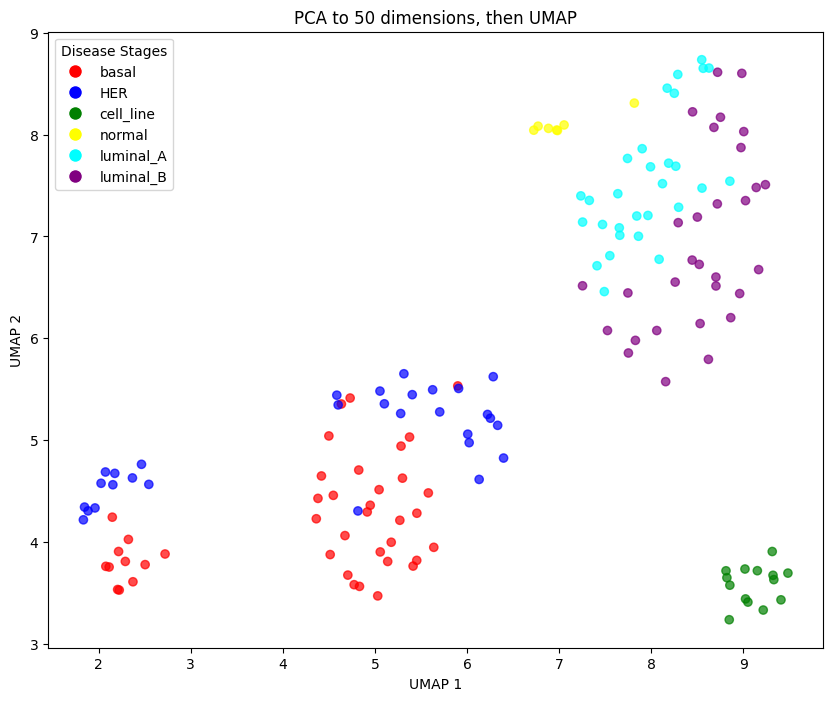

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming metadata contains the 'type' column representing disease stages and raw_data is the dataset

types = metadata['type']
type_codes = types.astype('category').cat.codes  # Encoding the types as numeric values

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data)  # Exclude 'type' column from raw_data

# Step 2: Apply PCA (reduce to 50 dimensions)
pca = PCA(n_components=50)
pca_result = pca.fit_transform(scaled_data)

# Step 3: Apply UMAP (reduce to 2 dimensions)
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(pca_result)

# Step 4: Create a 2D scatter plot, color by disease stage (using type_codes for coloring)
fig, ax = plt.subplots(figsize=(10, 8))

# Get unique disease stages for legend
unique_types = types.unique()


# Create scatter plot with UMAP results, using type_codes for coloring
scatter = ax.scatter(umap_result[:, 0], umap_result[:, 1],
                     c=list(map(lambda x: dictionary[x], types)), alpha=0.7)

# Step 5: Create a normal legend based on the disease stages
# Create proxy artists for the legend

# Step 6: Add labels and title
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title('PCA to 50 dimensions, then UMAP')

# Add the legend
# Create a colormap with as many colors as there are unique disease stages
cmap = plt.get_cmap('viridis', len(unique_types))
dictionary = dict(zip(unique_types, ['red', 'blue', 'green', 'yellow', 'cyan', 'purple']))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in dictionary.values()]
ax.legend(handles, dictionary.keys(), title="Disease Stages")

# Step 8: Show the plot
plt.show()


In [24]:
dictionary

{'basal': 'red',
 'HER': 'blue',
 'cell_line': 'green',
 'normal': 'yellow',
 'luminal_A': 'cyan',
 'luminal_B': 'purple'}

In [25]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from matplotlib.colors import ListedColormap

# Assuming metadata contains the 'type' column representing disease stages and the data to apply PCA and UMAP to

In [26]:

# Extract the disease stage (type) column
types = metadata['type']
types.value_counts()

basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64

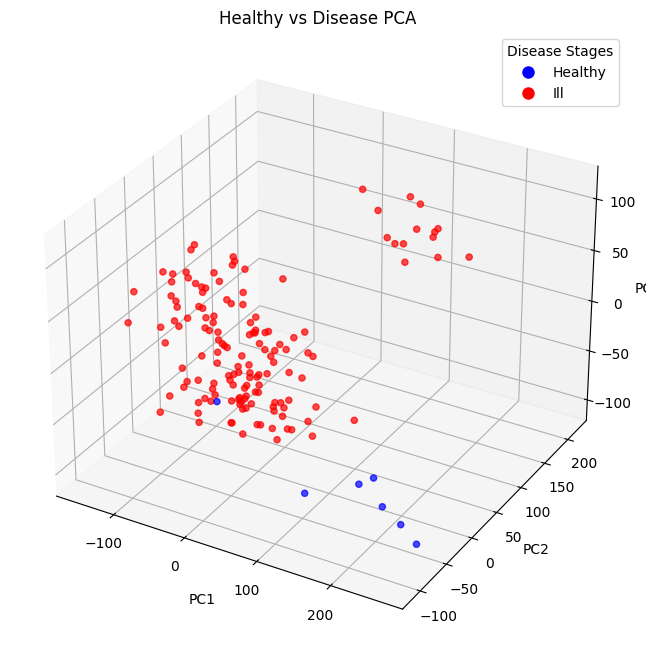

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming raw_data and metadata are already defined

# Standardize the data and apply log transformation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.log(1 + raw_data))  # Log transformation to handle skewed data

# Apply PCA (reduce to 3 dimensions)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Convert PCA result into a DataFrame for easier handling
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a color mapping based on disease stage
unique_types = metadata['type'].unique()
types = ['Healthy' if x == 'normal' else 'Ill' for x in metadata['type']]

# Define a colormap based on disease stages
cmap = plt.get_cmap('bwr', len(unique_types))

# Convert 'Healthy' and 'Ill' to numerical codes for coloring
type_codes = [0 if t == 'Healthy' else 1 for t in types]

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot with PCA results
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                     c=type_codes, cmap=cmap, alpha=0.7)

# Step 4: Create the legend based on the disease stages
# Create proxy artists for the legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Healthy'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Ill')
]

# Step 5: Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Healthy vs Disease PCA')

# Add the legend
ax.legend(handles=handles, title="Disease Stages")

# Step 7: Show the plot
plt.show()


In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(raw_data)

C:\Users\itani\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [52]:
centroids = kmeans.cluster_centers_
centroids

array([[10.32151133,  7.73396329,  6.34464254, ...,  2.88836419,
         3.58339597,  3.17322897],
       [10.53047237,  7.00659219,  6.13322575, ...,  2.91352688,
         3.59291333,  3.17695306],
       [ 9.90485661,  8.80843654,  5.28633026, ...,  3.0491902 ,
         3.84325174,  3.26545497],
       [10.21964567,  6.42885173,  5.52766222, ...,  2.89416297,
         3.52252645,  3.19171178],
       [10.02178449,  7.99323015,  6.48840018, ...,  2.89447156,
         3.60084732,  3.13334096],
       [10.79097358,  7.44661372,  6.46274334, ...,  2.9312847 ,
         3.64880829,  3.17576915]])

In [74]:
labels = kmeans.labels_
centroid_label = np.empty(len(centroids))
centroid_label.fill(7)
labels = np.append(labels, centroid_label)

In [45]:
a = np.empty(6)
a.fill(7)

In [62]:
raw_data.shape

(151, 54675)

In [67]:
centroids.shape
data_for_pca = raw_data
data_for_pca.columns = range(data_for_pca.shape[1])

In [68]:
data_with_centroids = pd.concat([data_for_pca,pd.DataFrame(centroids)],axis = 0)
data_with_centroids

,0,1,2,3,4,5,6,7,8,9,...,54665,54666,54667,54668,54669,54670,54671,54672,54673,54674
0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,3.368243,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,10.530472,7.006592,6.133226,7.374855,3.132310,7.567297,5.303239,4.764285,7.317002,4.228337,...,12.502655,11.974137,14.229499,14.006603,8.230104,6.366839,6.975824,2.913527,3.592913,3.176953
2,9.904857,8.808437,5.286330,7.584341,3.239354,6.533271,5.176932,5.055129,6.057817,3.847932,...,11.966830,11.342226,13.974987,13.708715,8.038253,6.453257,6.883349,3.049190,3.843252,3.265455
3,10.219646,6.428852,5.527662,7.587111,3.322261,8.135556,5.758591,4.578178,7.615436,3.770717,...,13.237785,12.811179,14.495650,14.342022,9.338737,5.328691,6.631454,2.894163,3.522526,3.191712
4,10.021784,7.993230,6.488400,7.272254,3.188358,7.158926,5.187362,4.698418,8.520414,3.639424,...,12.238164,11.701917,13.797752,13.521129,6.897341,5.217120,5.456402,2.894472,3.600847,3.133341


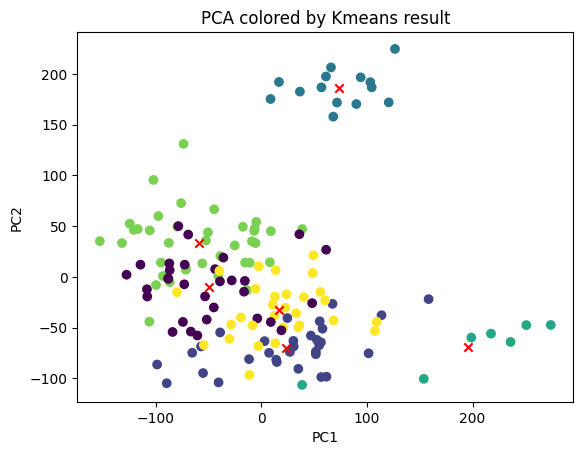

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_with_centroids)
pca = PCA(n_components=2)  # You can choose the number of components you want
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result[:-6], columns=['PC1', 'PC2'])
explained_variance = pca.explained_variance_ratio_

# cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, labels.unique())))

# Create scatter plot
plt.scatter(pca_df['PC1'], pca_df['PC2'],
                      c=labels[:-6])
centroids_Df = pd.DataFrame(pca_result[-6:], columns=['PC1', 'PC2'])

plt.scatter(centroids_Df['PC1'], centroids_Df['PC2'],
                      c='red', marker='x')
plt.title('PCA colored by Kmeans result')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


In [75]:
np.unique(labels, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 7.]),
 array([31, 31, 14,  7, 38, 30,  6], dtype=int64))

It seems very possible to classify samples as healthy or ill in after dimensional reduction to 3


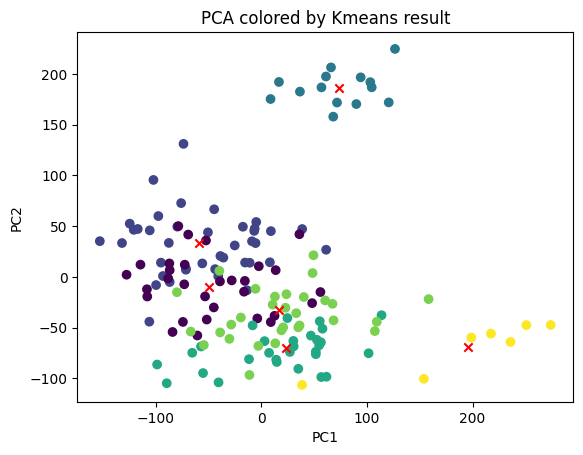

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_with_centroids)
pca = PCA(n_components=2)  # You can choose the number of components you want
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result[:-6], columns=['PC1', 'PC2'])
explained_variance = pca.explained_variance_ratio_

# cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, labels.unique())))

# Create scatter plot
plt.scatter(pca_df['PC1'], pca_df['PC2'],
                      c=type_codes, cmap=cmap)
centroids_Df = pd.DataFrame(pca_result[-6:], columns=['PC1', 'PC2'])

plt.scatter(centroids_Df['PC1'], centroids_Df['PC2'],
                      c='red', marker='x')
plt.title('PCA colored by Kmeans result')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()